In [1]:
import pandas as pd
import numpy as np

laws_and_policies = pd.read_excel('datasets/laws_and_policies_AGRI.xlsx')
laws_and_policies['Count'] = 1

laws_and_policies['agricultur_law'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==0), 0,1)
laws_and_policies['agricultur_law_yes'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==0), "no", "yes")
laws_and_policies.Count.sum()

1880

In [2]:
pd.set_option('display.max_columns', None)
laws_and_policies.head(10)

,Unnamed: 0,Title,Type,Geography,Geography ISO,Frameworks,Responses,Instruments,Document Types,Natural Hazards,Keywords,Sectors,Events,Documents,Parent Legislation,Description,sector_agriculture,matches,count_matches,EU_country,First,Second,Third,Fourth,First_date,First_year,After_1992,Count,agricultur_law,agricultur_law_yes
0,240,Agricultural Land Protection Act,legislative,Bulgaria,BGR,NaN,NaN,NaN,Law,NaN,Redd+ And Lulucf,"Waste, LULUCF, Agriculture",24/04/1996|Law passed;28/11/2014|Last amended,NaN,NaN,The Agricultural Land Protection Act allows la...,1,"'agricultural', 'agriculture'",9,1,24/04/1996|Law passed,28/11/2014|Last amended,NaN,NaN,24/04/1996,1996,1,1,1,yes
1,441,Law No. 11/022 (Fundamental Agricultural Law),legislative,Democratic Republic of Congo,COD,NaN,NaN,NaN,Law,NaN,"Research And Development, Energy Supply, Redd+...","LULUCF, Energy, Agriculture",24/12/2011|Law passed,NaN,NaN,Given the huge dependence of the largely rural...,1,"'agricultural', 'agriculture'",8,0,24/12/2011|Law passed,NaN,NaN,NaN,24/12/2011,2011,1,1,1,yes
2,1540,"Framework Act on Agriculture, Rural Community ...",legislative,South Korea,KOR,NaN,"Adaptation, Disaster Risk Management",NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...","Water, Energy, Agriculture",22/06/2015|Law passed;25/12/2017|Last amendment,Full text (PDF)|https://climate-laws.org/rails...,NaN,This act outlines a general framework for the ...,1,"'agricultural', 'agriculture'",8,0,22/06/2015|Law passed,25/12/2017|Last amendment,NaN,NaN,22/06/2015,2015,1,1,1,yes
3,1258,Amended Law no. 2/2003 on Agriculture,legislative,Palestine,PSE,NaN,"Adaptation, Disaster Risk Management",NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...","Environment, LULUCF, Agriculture",25/12/2003|Law passed,NaN,NaN,The law no 2 of 2003 aims at enabling the sust...,1,'agricultural',8,0,25/12/2003|Law passed,NaN,NaN,NaN,25/12/2003,2003,1,1,1,yes
4,883,Agriculture (Farm Forestry) Rules 2009,executive,Kenya,KEN,NaN,NaN,NaN,Regulation/Rules,NaN,Redd+ And Lulucf,"Environment, Water, LULUCF, Agriculture",25/12/2009|Law passed,link to text via webpage|http://kenyalaw.org/k...,NaN,<div><br><br>&nbsp;<br>&nbsp;The Agriculture F...,1,"'agricultural', 'agriculture'",8,0,25/12/2009|Law passed,NaN,NaN,NaN,25/12/2009,2009,1,1,1,yes
5,1021,The National Agricultural Policy and Agricultu...,executive,Mali,MLI,NaN,NaN,NaN,Policy,NaN,Redd+ And Lulucf,"Economy-wide, Agriculture",25/12/2005|Law passed;25/12/2013|Last amendment,NaN,NaN,The agriculture development policy of Mali (PD...,1,"'agricultural', 'agriculture'",8,0,25/12/2005|Law passed,25/12/2013|Last amendment,NaN,NaN,25/12/2005,2005,1,1,1,yes
6,1176,Climate Change Response (Zero Carbon) Amendmen...,legislative,New Zealand,NZL,Mitigation,NaN,Standards and obligations|Regulation;Taxes|Inc...,Law,NaN,"Institutions / Administrative Arrangements, Ca...","Waste, Transportation, LULUCF, Economy-wide, A...",18/11/2002|Law passed||;25/12/2014|Last amendm...,Climate Change Response (Zero Carbon) Amendmen...,NaN,<div>The Climate Change Response Act 2002 esta...,1,'agriculture',7,0,18/11/2002|Law passed||,25/12/2014|Last amendment||,01/11/2019|Amended by the Climate Change Respo...,22/06/2020|Amended by the Emissions Trading Re...,18/11/2002,2002,1,1,1,yes
7,1131,Myanmar Climate-Smart Agriculture Strategy,executive,Myanmar,MMR,NaN,"Adaptation, Disaster Risk Management",NaN,Strategy,NaN,"Adaptation, Institutions / Administrative Arra...","Water, Transportation, LULUCF, Energy, Agricul...",01/09/2015|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,The Climate-Smart Agriculture Strategy (CSA) h...,1,"'agricultural', 'agriculture'",7,0,01/09/2015|Law passed,NaN,NaN,NaN,01/09/2015,2015,1,1,1,yes
8,891,Kenya Climate Smart Agriculture Strategy 2017-...,executive,Kenya,KEN,NaN,"Adaptation, Mitigation",NaN,Strategy,NaN,"Adaptation, LULUCF","Water, Residential and Commercial, Agriculture",25/12/2017|Law passed,Full text (PDF)|https://climate-laws

In [3]:
laws_and_policies.columns

Index(['Unnamed: 0', 'Title', 'Type', 'Geography', 'Geography ISO',
       'Frameworks', 'Responses', 'Instruments', 'Document Types',
       'Natural Hazards', 'Keywords', 'Sectors', 'Events', 'Documents',
       'Parent Legislation', 'Description', 'sector_agriculture', 'matches',
       'count_matches', 'EU_country', 'First', 'Second', 'Third', 'Fourth',
       'First_date', 'First_year', 'After_1992', 'Count', 'agricultur_law',
       'agricultur_law_yes'],
      dtype='object')

# Adjusting the dataset
#### Type of policies

In [4]:
# laws_and_policies['Sectors'].head(10)


In [5]:
# turns the sectors into individual columns (not ordered)
# laws_and_policies[['Sector_1','Sector_2','Sector_3','Sector_4','Sector_5','Sector_6','Sector_7','Sector_8','Sector_9','Sector_10','Sector_11','Sector_12']]=laws_and_policies.Sectors.str.split(",",expand=True)

#### Dates and status of the policy

In [6]:
# splitting the Events colum

# laws_and_policies[['First','Second','Third','Fourth']]=laws_and_policies.Events.str.split(";",expand=True)

# laws_and_policies['First_date']=laws_and_policies['First'].str.slice(stop=10)
# laws_and_policies['First_status']=laws_and_policies['First'].str.slice(start=11)
# laws_and_policies['First_year']=laws_and_policies['First_date'].str.slice(start=6)

# laws_and_policies['Second_date']=laws_and_policies['Second'].str.slice(stop=10)
# laws_and_policies['Second_status']=laws_and_policies['Second'].str.slice(start=11)
# laws_and_policies['Second_year']=laws_and_policies['Second_date'].str.slice(start=6)

# laws_and_policies['Third_date']=laws_and_policies['Third'].str.slice(stop=10)
# laws_and_policies['Third_status']=laws_and_policies['Third'].str.slice(start=11)
# laws_and_policies['Third_year']=laws_and_policies['Third_date'].str.slice(start=6)

# laws_and_policies['Fourth_date']=laws_and_policies['Fourth'].str.slice(stop=10)
# laws_and_policies['Fourth_status']=laws_and_policies['Fourth'].str.slice(start=11)
# laws_and_policies['Fourth_year']=laws_and_policies['Fourth_date'].str.slice(start=6)

# laws_and_policies.head(100)

# # checking the extracted values
# laws_and_policies.First_year.unique() 
# laws_and_policies.Second_year.unique() 
# laws_and_policies.Third_year.unique() 
# laws_and_policies.Fourth_year.unique() 

In [7]:
laws_and_policies.head(4)

,Unnamed: 0,Title,Type,Geography,Geography ISO,Frameworks,Responses,Instruments,Document Types,Natural Hazards,Keywords,Sectors,Events,Documents,Parent Legislation,Description,sector_agriculture,matches,count_matches,EU_country,First,Second,Third,Fourth,First_date,First_year,After_1992,Count,agricultur_law,agricultur_law_yes
0,240,Agricultural Land Protection Act,legislative,Bulgaria,BGR,NaN,NaN,NaN,Law,NaN,Redd+ And Lulucf,"Waste, LULUCF, Agriculture",24/04/1996|Law passed;28/11/2014|Last amended,NaN,NaN,The Agricultural Land Protection Act allows la...,1,"'agricultural', 'agriculture'",9,1,24/04/1996|Law passed,28/11/2014|Last amended,NaN,NaN,24/04/1996,1996,1,1,1,yes
1,441,Law No. 11/022 (Fundamental Agricultural Law),legislative,Democratic Republic of Congo,COD,NaN,NaN,NaN,Law,NaN,"Research And Development, Energy Supply, Redd+...","LULUCF, Energy, Agriculture",24/12/2011|Law passed,NaN,NaN,Given the huge dependence of the largely rural...,1,"'agricultural', 'agriculture'",8,0,24/12/2011|Law passed,NaN,NaN,NaN,24/12/2011,2011,1,1,1,yes
2,1540,"Framework Act on Agriculture, Rural Community ...",legislative,South Korea,KOR,NaN,"Adaptation, Disaster Risk Management",NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...","Water, Energy, Agriculture",22/06/2015|Law passed;25/12/2017|Last amendment,Full text (PDF)|https://climate-laws.org/rails...,NaN,This act outlines a general framework for the ...,1,"'agricultural', 'agriculture'",8,0,22/06/2015|Law passed,25/12/2017|Last amendment,NaN,NaN,22/06/2015,2015,1,1,1,yes
3,1258,Amended Law no. 2/2003 on Agriculture,legislative,Palestine,PSE,NaN,"Adaptation, Disaster Risk Management",NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...","Environment, LULUCF, Agriculture",25/12/2003|Law passed,NaN,NaN,The law no 2 of 2003 aims at enabling the sust...,1,'agricultural',8,0,25/12/2003|Law passed,NaN,NaN,NaN,25/12/2003,2003,1,1,1,yes


# Subset the data to only include EU countries with laws as from 1992

In [8]:
laws_and_policies=laws_and_policies[laws_and_policies["EU_country"]>0]
laws_and_policies=laws_and_policies[laws_and_policies["After_1992"]>0]
laws_and_policies.Count.sum()

428

# Plots
## laws per country

In [9]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

#### Dataset "Geography"

In [10]:
# dataset aggregated to country level
Geography=laws_and_policies.groupby('Geography').sum() # aggregate the data by country
Geography['countries'] = Geography.index # add rownames as columns
Geography['countries_with_agricultur_law'] = np.where((Geography['agricultur_law']>0), 1, 0)

# subset dataset with only agriculture laws
Geography_subset=Geography[Geography["agricultur_law"]>0] 
Geography_subset=Geography_subset.sort_values(by=['agricultur_law'], ascending=False)

Geography.head(10)

,Unnamed: 0,sector_agriculture,count_matches,EU_country,First_year,After_1992,Count,agricultur_law,countries,countries_with_agricultur_law
Geography,,,,,,,,,,
Austria,972,2,3,9,18066,9,9,2,Austria,1
Belgium,1727,1,1,11,22084,11,11,1,Belgium,1
Bulgaria,2596,1,9,11,22083,11,11,1,Bulgaria,1
Croatia,5955,0,0,15,30172,15,15,0,Croatia,0
Cyprus,414,0,0,1,2013,1,1,0,Cyprus,0
Czechia,3771,1,1,9,18066,9,9,1,Czechia,1
Denmark,6303,2,2,14,28119,14,14,2,Denmark,1
Estonia,1545,1,1,3,6035,3,3,1,Estonia,1
European Union,18018,4,6,33,66326,33,33,4,European Union,1


#### laws per country (all laws)

Text(0.5, 1.0, 'Number of laws per country')

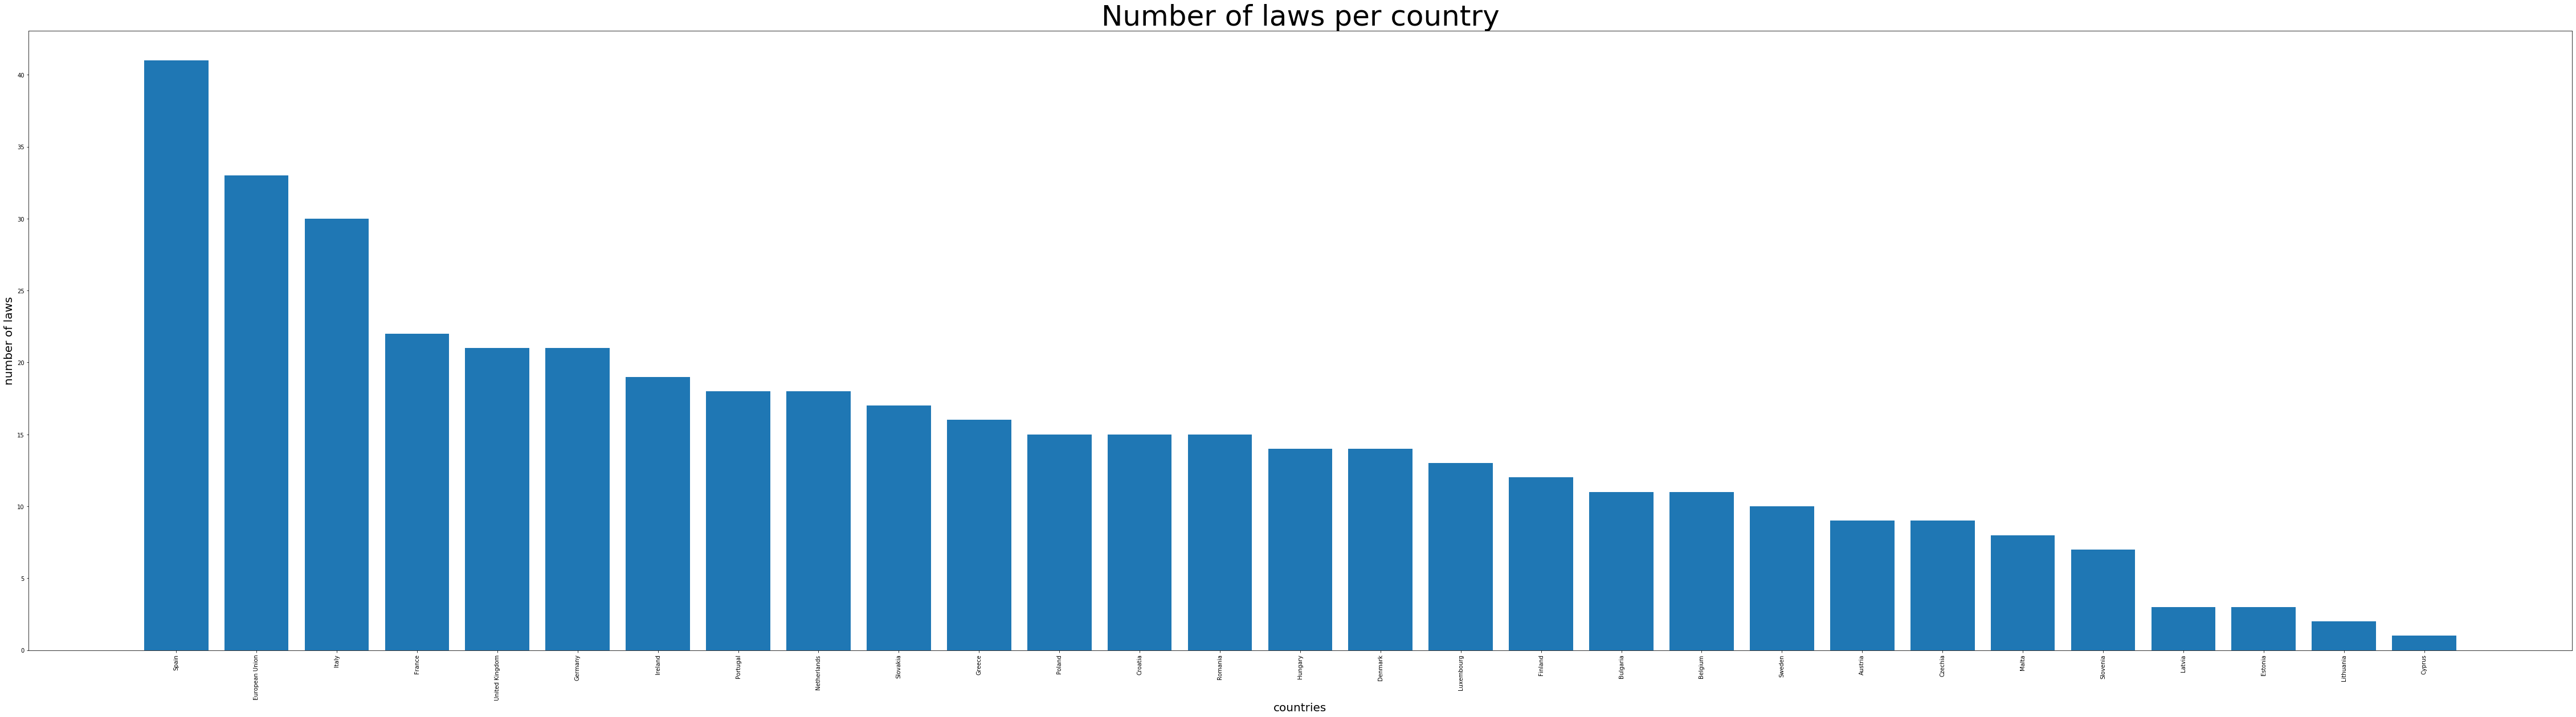

In [11]:
Geography=Geography.sort_values(by=['Count'], ascending=False)

rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Geography['countries'].to_list()) # change column to list to use it for the plot
y_units = (Geography['Count'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('countries', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
plt.title('Number of laws per country', fontsize = 50)

# plt.tight_layout()
# plt.show()

#plt.savefig('Graphics/Laws_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot 


#### laws per country (only agriculture)

Text(0.5, 1.0, 'Number of agriculture laws per country')

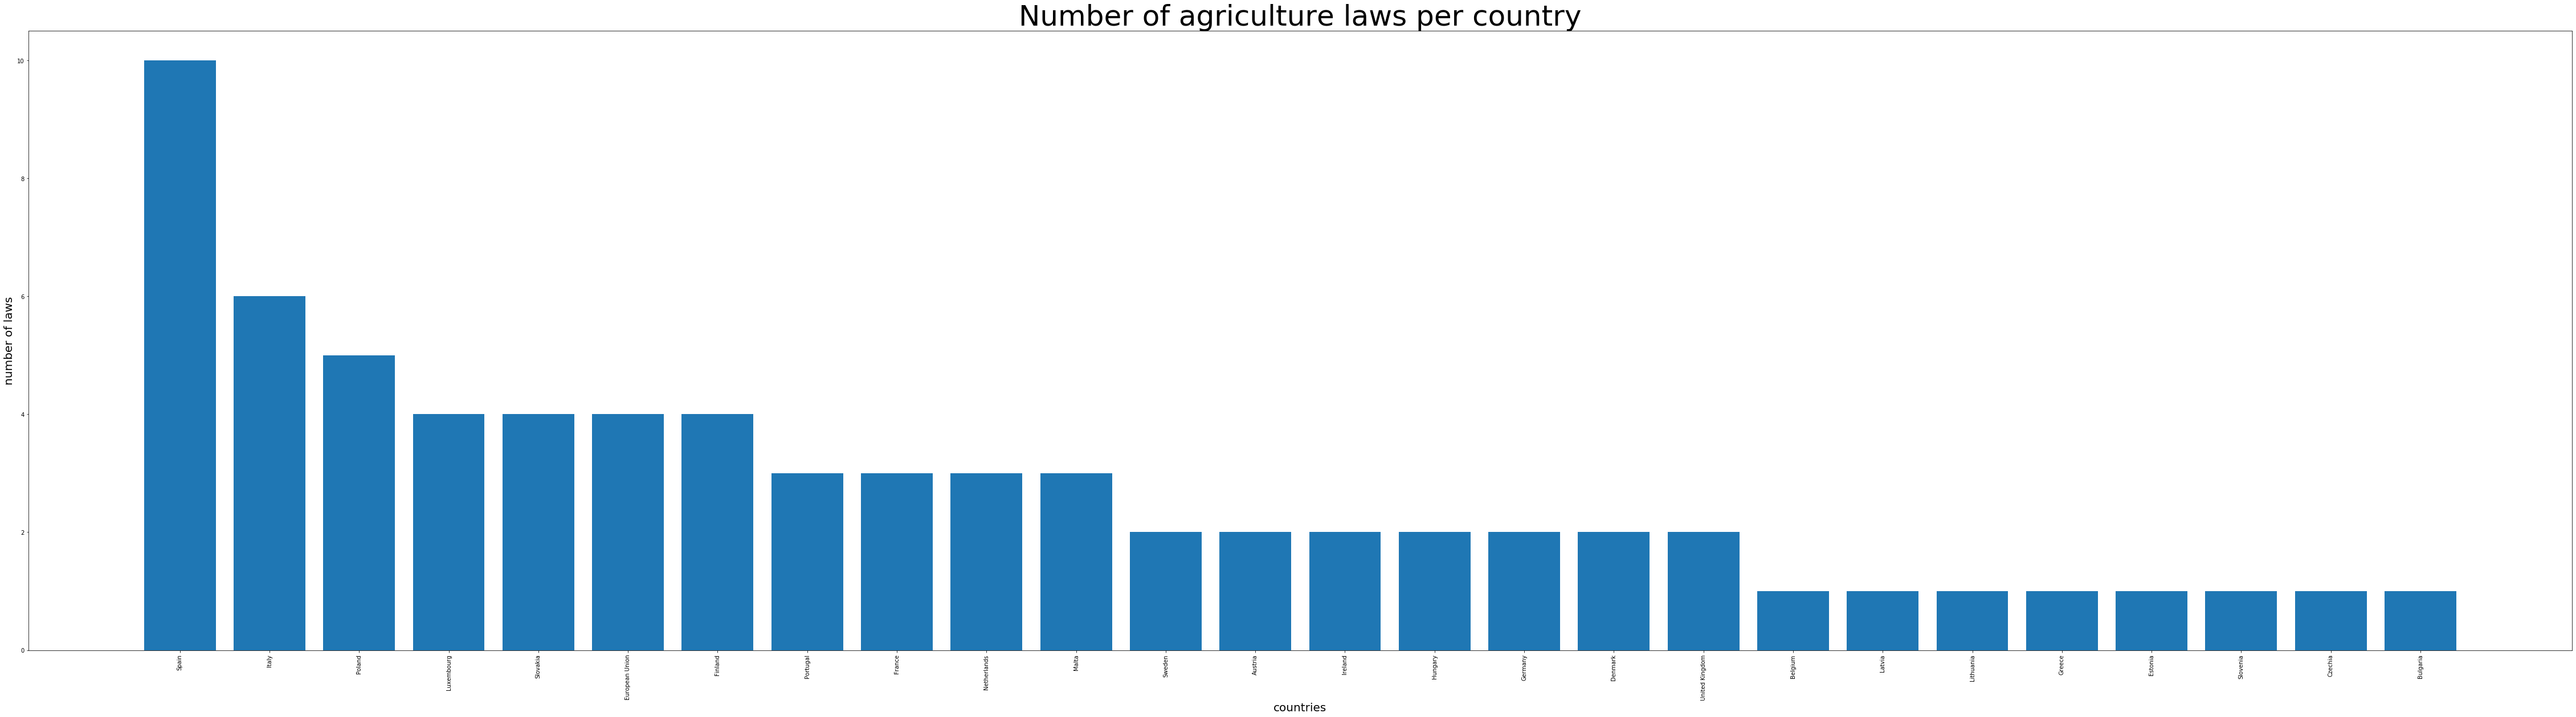

In [12]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Geography_subset['countries'].to_list()) # change column to list to use it for the plot
y_units = (Geography_subset['agricultur_law'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('countries', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
plt.title('Number of agriculture laws per country', fontsize = 50)

# plt.tight_layout()
# plt.show()

#plt.savefig('Graphics/Laws_agriculture_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all laws + agricultural laws per country combined

Text(0.5, 1.0, 'Number of agriculture and other laws per country')

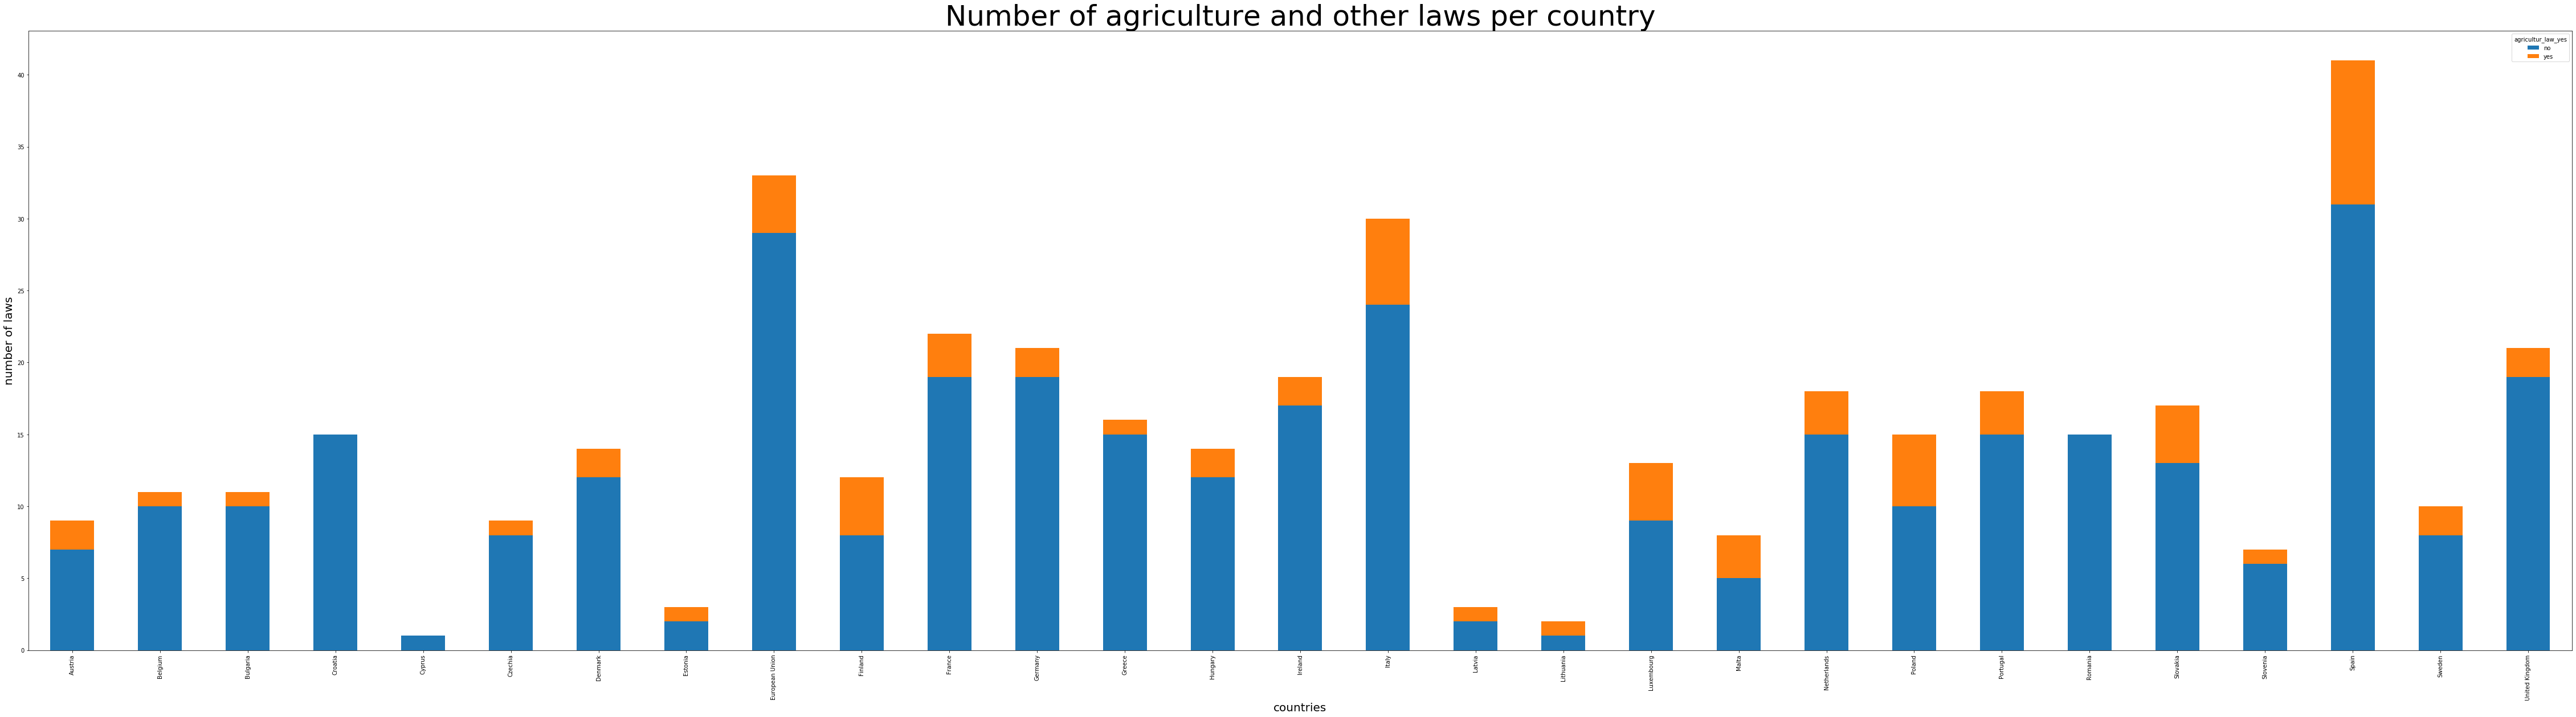

In [13]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['Geography','agricultur_law_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('countries', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
plt.title('Number of agriculture and other laws per country', fontsize = 50)

#plt.savefig('Graphics/Laws_divided_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### countries with agriculture laws

Text(0.5, 1.0, 'Countries with agriculture laws')

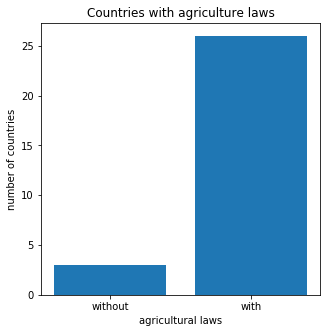

In [14]:
# subsetting the Geography dataset
Division=Geography[['countries_with_agricultur_law','agricultur_law']].copy()
Division['number_countries'] = 1

# creating the with / without column for the x-axis grouping
Division=Division.groupby('countries_with_agricultur_law').sum()
bins=[-10,1,np.inf]
names=['without','with']
Division['groups']=pd.cut(Division['agricultur_law'],bins, labels = names)

# setting the size of the figure
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Division['groups'].to_list()) # change column to list to use it for the plot
y_units = (Division['number_countries'].to_list()) # change column to list to use it for the plot

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('agricultural laws')
plt.ylabel('number of countries')
plt.title('Countries with agriculture laws')

# saving the file
#plt.savefig('Graphics/ration_countries_with_agriculture_laws.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### agricultural laws out of all laws ( 1 = agriculture law)

Text(0.5, 1.0, 'Total number of agriculture and other laws')

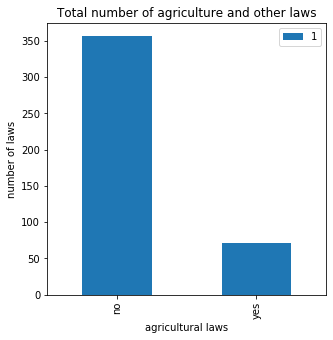

In [15]:
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['agricultur_law','Count']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('agricultural laws')
plt.ylabel('number of laws')
L=plt.legend()
plt.xticks((0,1), ("no","yes"))
plt.title('Total number of agriculture and other laws')


#plt.savefig('Graphics/ratio_agricultural_laws.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


# laws per year

#### all laws + agricultural laws per year (ABSOLUT VALUES)

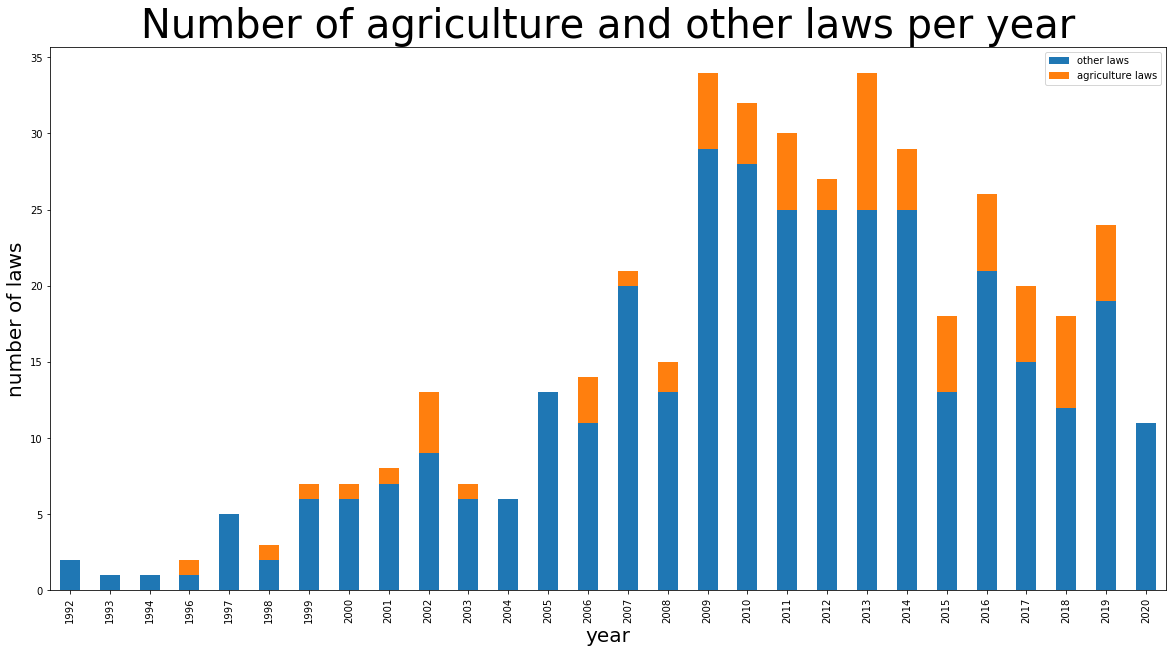

In [21]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['First_year','agricultur_law_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other laws')
L.get_texts()[1].set_text('agriculture laws')
plt.title('Number of agriculture and other laws per year', fontsize = 40)

plt.savefig('Graphics/Laws_total_divided_per_year_absolut.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all laws + agricultural laws per year (PERCENTAGES) - Work in progress ;)

In [ ]:
# import matplotlib.ticker as mtick
# rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

# laws_and_policies.groupby(['First_year','agricultur_law_yes']).size().unstack().plot(kind='bar',stacked=True)

# plt.xlabel('year', fontsize = 20)
# plt.ylabel('number of laws', fontsize = 20)
# L=plt.legend()
# L.get_texts()[0].set_text('other laws')
# L.get_texts()[1].set_text('agriculture laws')
# plt.title('Number of agriculture and other laws per year', fontsize = 40)

# plt.savefig('Graphics/Laws_total_divided_per_year_percentage.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot
